In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

import tensorflow_hub as hub
import numpy as np
import numpy
import pandas as pd
import pickle

In [2]:
tf.get_logger().setLevel('ERROR')

In [42]:
img_size = (224, 224) 
batch_size = None

In [43]:
# Loadmodel
model = tf.keras.models.load_model('saved_models/tl_mobileNetV2/model/tl_22112022_12h10_1.h5', custom_objects=None, compile=True, options=None)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=img_size+(3,), batch_size=None)
])
# Show the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                             

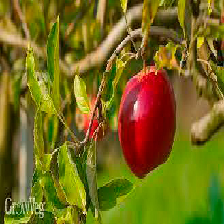

In [44]:
# Load singel image
img = tf.keras.preprocessing.image.load_img(
    "../data/80apples/naamloze map/AnyConv.com__download (15).jpg", target_size=img_size)
img

In [45]:
img = np.array(img)/255.0
img = np.reshape(img, (224,224,3))
img.shape

(224, 224, 3)

In [46]:
img[np.newaxis, :]

array([[[[0.50588235, 0.46666667, 0.01568627],
         [0.4627451 , 0.41960784, 0.        ],
         [0.42352941, 0.38431373, 0.        ],
         ...,
         [0.67058824, 0.63137255, 0.29019608],
         [0.63137255, 0.58823529, 0.23921569],
         [0.53333333, 0.44313725, 0.0745098 ]],

        [[0.54117647, 0.50196078, 0.06666667],
         [0.48627451, 0.44705882, 0.00392157],
         [0.45490196, 0.41176471, 0.        ],
         ...,
         [0.67843137, 0.63137255, 0.29411765],
         [0.62745098, 0.57647059, 0.21568627],
         [0.50980392, 0.42352941, 0.02745098]],

        [[0.54117647, 0.50196078, 0.06666667],
         [0.48627451, 0.44705882, 0.00392157],
         [0.45490196, 0.41176471, 0.        ],
         ...,
         [0.67843137, 0.63137255, 0.29411765],
         [0.62745098, 0.57647059, 0.21568627],
         [0.50980392, 0.42352941, 0.02745098]],

        ...,

        [[0.09411765, 0.15686275, 0.00392157],
         [0.15686275, 0.18431373, 0.01960784]

In [47]:
result = classifier.predict(img[np.newaxis, :])
result.shape

1/1 [==============================] - 1s 550ms/step


(1, 1001)

In [48]:
predicted_label_index = np.argmax(result)
predicted_label_index

990

In [49]:
predictions = model.predict_on_batch(img).flatten()
# predictions = model.predict(img).flatten()


predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)
# predictions = list(predictions)

predictions = predictions.tolist()


print('Predictions:\n', predictions.numpy())
print('Labels:\n', labels)


ValueError: in user code:

    File "/Users/JeroenArians/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/Users/JeroenArians/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/JeroenArians/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/JeroenArians/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/Users/JeroenArians/miniconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/JeroenArians/miniconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(224, 224, 3)
